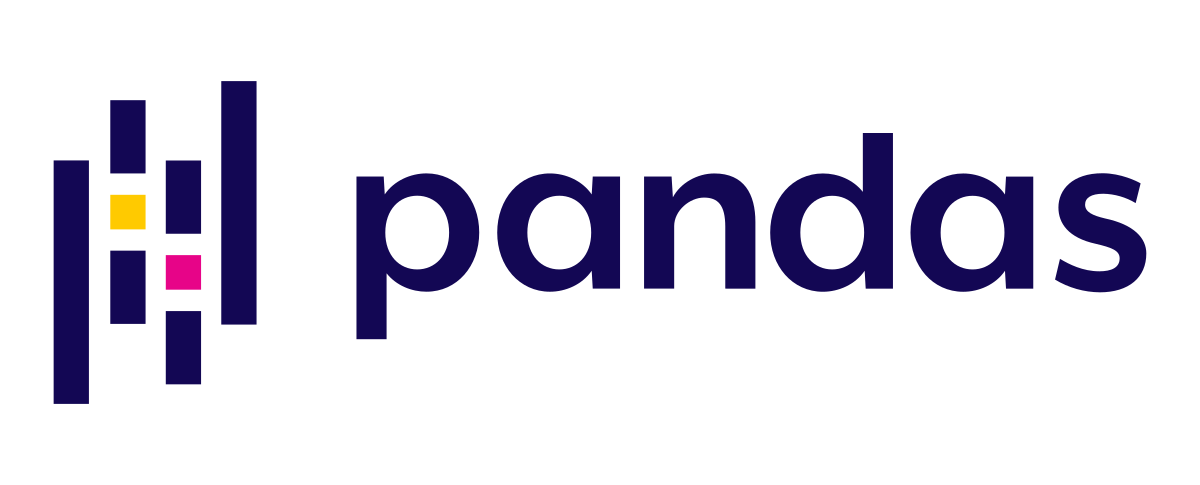

# Pandas: Series

Pandas is probably the most used library for data analysis. You'll get data from external sources, process it (combine, merge, etc), visualize it, performing statistical analysis, predicting with machine learning, and sure there will be other libraries, but Pandas is likely the most important library in the data science ecosystem.

It's a very mature library. It's been around a long time. To get familiar with the different data structures available in Pandas we'll start with the 'Series'.

In [1]:
import pandas as pd
import numpy as np #matplotlib, pandas and others all sit atop NumPy

We'll start analyzing "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a pandas.Series object.

In [2]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

The ordered sequence or indexed sequence of elements make up a series. It looks like a Python list, but there are some marked differences.

In [3]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

The first is that series have types. 

Someone might not know we're representing population in millions of inhabitants. Series can also have a name, to better document the purpose of the Series:

In [4]:
g7_pop.name = 'G7 Population in millions'

In [5]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

Series are pretty similar to numpy arrays:

In [6]:
g7_pop.dtype

dtype('float64')

In [7]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

They're actually backed by numpy arrays:

In [8]:
type(g7_pop.values)

numpy.ndarray

And they look like simple Python lists or Numpy Arrays. But they're actually more similar to Python `dicts`.

A Series has an `index`, that's similar to the automatic index assigned to Python's lists:

In [9]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

In [10]:
g7_pop[0] #get the first element

35.467

In [11]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [12]:
l = ['a', 'b', 'c'] # there is an index here: 0,1, 2

But, in contrast to lists, we can explicitly define the index:

In [13]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [14]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Compare it with the [following table](https://docs.google.com/spreadsheets/d/1iZ8e0vzCq0ifT53hGcwnMpDEx6Y_alfm60Ld7xICLwU/edit?usp=sharing):

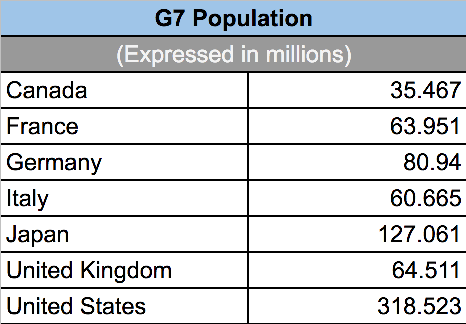

We can say that Series look like "ordered dictionaries". We can actually create Series out of dictionaries.

Each of the methods below create the series from scratch.

In [15]:
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [16]:
pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [17]:
pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])

France     63.951
Germany    80.940
Italy      60.665
Spain         NaN
Name: G7 Population in millions, dtype: float64

***

## Indexing

Indexing works similarly to lists and dictionaries, you use the **index** of the element you're looking for:

In [18]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [19]:
g7_pop['Canada']

35.467

In [20]:
g7_pop['Japan']

127.061

In sum, a series is an ordered sequence of elements backed up by a NumPy array making working with it fast and efficient. It also has an index that can take any labels we pass which makes indexing and filtering a lot easier.

Numeric positions can also be used, with the `iloc` attribute:

In [21]:
g7_pop.iloc[0] #locate by sequential position

35.467

In [22]:
g7_pop.iloc[-1]

318.523

Selecting multiple elements at once:

In [23]:
g7_pop[['Italy', 'France']]

Italy     60.665
France    63.951
Name: G7 Population in millions, dtype: float64

(The result is another Series)

In [24]:
g7_pop.iloc[[0, 1]]

Canada    35.467
France    63.951
Name: G7 Population in millions, dtype: float64

Slicing also works, but **important**, in Pandas, the upper limit is also included:

In [25]:
g7_pop['Canada': 'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

***

## Conditional selection (boolean arrays)

The same boolean array techniques we saw applied to numpy arrays can be used for Pandas `Series`:

In [26]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [27]:
g7_pop > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [28]:
g7_pop[g7_pop > 70]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [29]:
g7_pop.mean()

107.30257142857144

In [30]:
g7_pop[g7_pop > g7_pop.mean()]

Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [31]:
g7_pop.std()

97.24996987121581

`~` not  
`|` or  
`&` and

In [32]:
g7_pop[(g7_pop < g7_pop.mean() - g7_pop.std() / 2) | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)]

Canada            35.467
United States    318.523
Name: G7 Population in millions, dtype: float64

***

## Operations and methods

Series also support vectorized operations and aggregation functions as Numpy:

In [33]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [34]:
g7_pop * 1_000_000

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in millions, dtype: float64

In [35]:
g7_pop.mean()

107.30257142857144

In [36]:
np.log(g7_pop)

Canada            3.568603
France            4.158117
Germany           4.393708
Italy             4.105367
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: G7 Population in millions, dtype: float64

In [37]:
g7_pop['France': 'Italy'].mean()

68.51866666666666

***

### Boolean arrays

(Work in the same way as numpy)

In [38]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [39]:
g7_pop > 80

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [40]:
g7_pop[g7_pop > 80] #broadcasting boolean operators works in pandas just like numpy.

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [41]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [42]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     80.940
Japan      127.061
Name: G7 Population in millions, dtype: float64

***

## Modifying series

In [43]:
g7_pop['Canada'] = 40.5

In [44]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [45]:
g7_pop.iloc[-1] = 500

In [46]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [47]:
g7_pop[g7_pop < 70]

Canada            40.500
France            63.951
Italy             60.665
United Kingdom    64.511
Name: G7 Population in millions, dtype: float64

In [48]:
g7_pop[g7_pop < 70] = 99.99

In [49]:
g7_pop

Canada             99.990
France             99.990
Germany            80.940
Italy              99.990
Japan             127.061
United Kingdom     99.990
United States     500.000
Name: G7 Population in millions, dtype: float64